In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_nba_2020.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.0,...,3.2,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.0,...,5.3,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,1.2,...,3.6,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.0,...,0.0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,1.0,...,0.8,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [123]:
# Questions to investigate in EDA
# Who has the highest points per game?
# Who has the highest assists per game?
# Who has the highest blocks per game?
# Who has the best record? 
# Is there a relationship between pts and position?
# Is there a relationship between team and pts?

In [124]:
# Who has the most points per game?
most_ppg = df[df['PTS'] == df['PTS'].max()]
most_ppg

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
245,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,4.4,...,11.8,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3


In [125]:
# Who has the most assists per game?
most_apg = df[df['AST'] == df['AST'].max()]
most_apg

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
305,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,2.2,...,5.7,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3


In [126]:
# Who has the most blocks per game?
most_bpg = df[df['BLK'] == df['BLK'].max()]
most_bpg

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
607,Hassan Whiteside,C,30,POR,67,61,30.0,6.5,10.5,0.1,...,3.6,3.9,9.7,13.5,1.2,0.4,2.9,1.8,2.9,15.5


In [127]:
## Who has the best record?
avg_triple_double = df.apply(lambda x: x.PTS + x.AST + x.BLK, axis = 1)
df['triple double score'] = avg_triple_double
best_record = df[df['triple double score'] == df['triple double score'].max()]
best_record

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,triple double score
245,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,4.4,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,42.7


array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

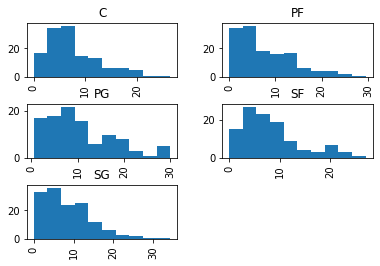

In [128]:
# Is there a relationship between points and position?
# Visualize using histogram, boxplot, and heatmap 

# Histogram in pandas
df['PTS'].hist(by=df['Pos'])

<BarContainer object of 632 artists>

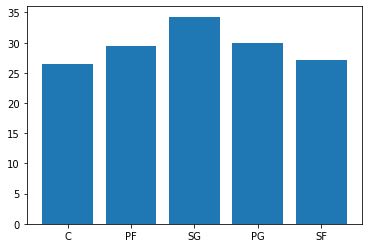

In [129]:
# Histogram in matplotlib
x = df['Pos']
y = df['PTS']
plt.bar(x, y, label = 'Relationship between Pos and PTS')

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

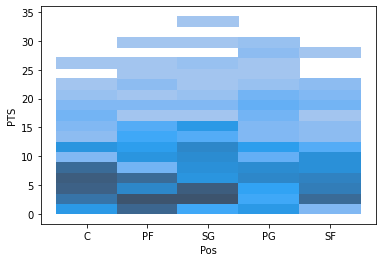

In [130]:
# Histogram in seaborn
sns.histplot(df, x="Pos", y="PTS")

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

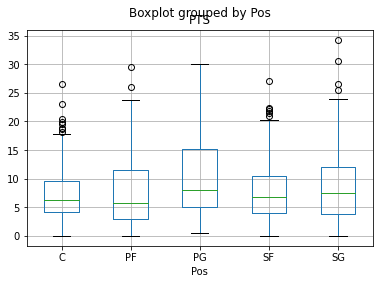

In [131]:
# Boxplot in pandas
df.boxplot(column= 'PTS', by='Pos')

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

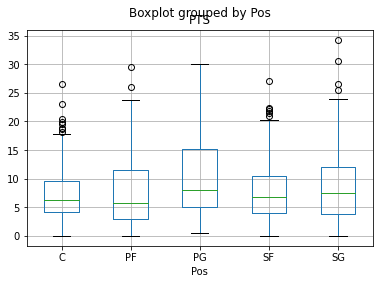

In [132]:
# Boxplot in matplotlib
df.boxplot(column='PTS', by='Pos')

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

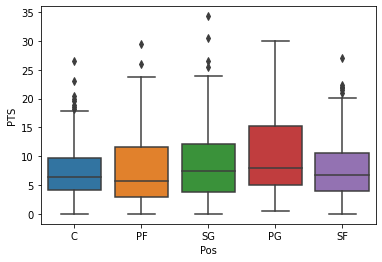

In [133]:
# Boxplot in seaborn
sns.boxplot(data=df, x='Pos', y='PTS')

<Figure size 1440x720 with 0 Axes>

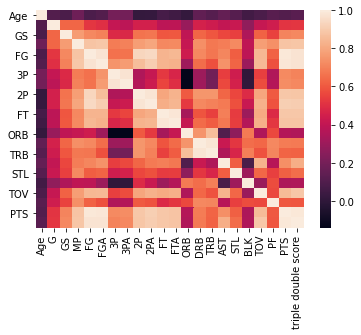

<Figure size 1440x720 with 0 Axes>

In [134]:
# Heat map
# pivot data set
data = df.corr()
sns.heatmap(data)
plt.figure(figsize = (20, 10))

In [135]:
# Is there a relationship between team and points?

<BarContainer object of 632 artists>

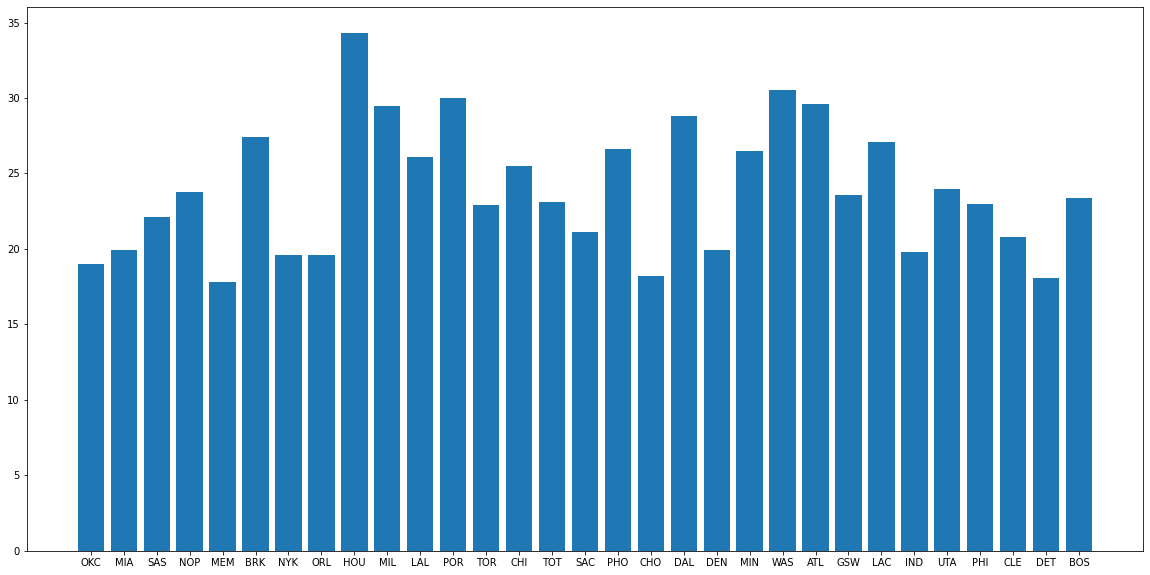

In [136]:
# Histogram
x = df['Tm']
y = df['PTS']
plt.figure(figsize=(20, 10))
plt.bar(x, y)

<AxesSubplot:xlabel='Tm', ylabel='PTS'>

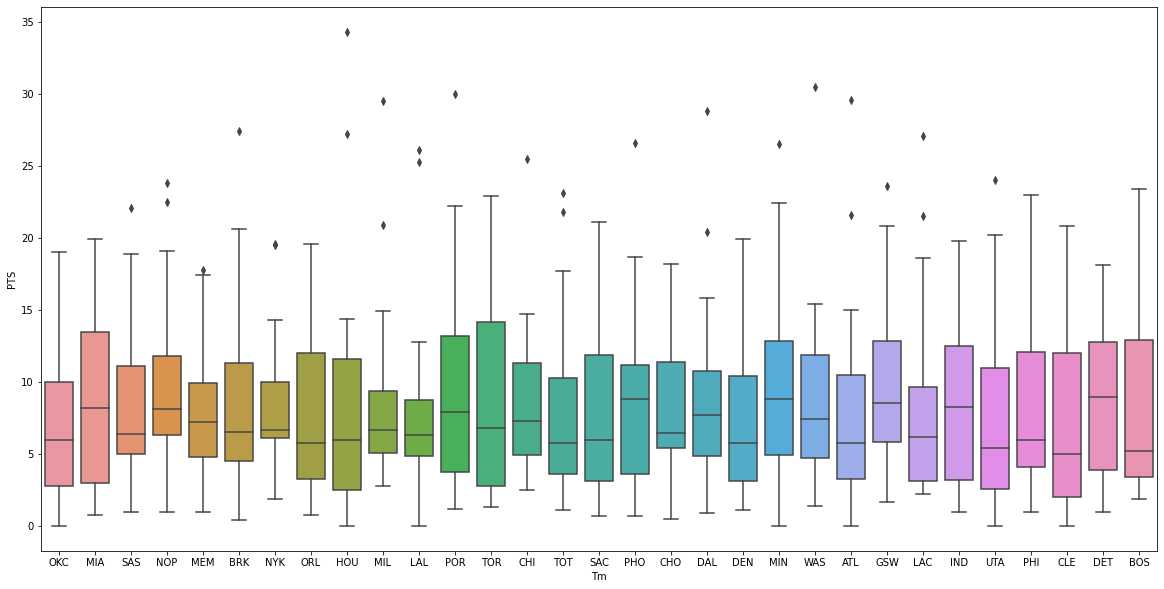

In [137]:
# Boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Tm', y='PTS', data=df)